In [129]:
## Goal: Explore data w/ visualizations for Adventure Works dataset 
      #    for purpose of Classification Supervised ML w/ label= BikeBuyer

# Import Python pkgs pandas, numpy, matplotlib.pyplot, & seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn import cross_validation
from sklearn import feature_selection as fs
from sklearn import metrics, cross_validation
import scipy.stats as ss
import sklearn.decomposition as skde
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline  
# Start of magic command which configures execution environment, to display graphics w/in notebook

In [130]:
# Load already prepared dataset, display shape, & explore first 10 rows of Pandas data frame

AW_Custs_C = pd.read_csv('AdvWorksCusts_Preped.csv', header=0)
print(AW_Custs_C.shape)
AW_Custs_C.head()

(16404, 21)


,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,AveMonthSpend,BikeBuyer
0,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,4/8/1966,Bachelors,...,M,M,1,0,0,2,137947,31,89,0
1,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,5/14/1965,Bachelors,...,M,S,0,1,3,3,101141,32,117,1
2,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,8/12/1965,Bachelors,...,M,M,1,1,3,3,91945,32,123,0
3,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,2/15/1968,Bachelors,...,F,S,0,1,0,0,86688,29,50,0
4,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,8/8/1968,Bachelors,...,F,S,1,4,5,5,92771,29,95,1


In [131]:
# Testing for Class Imbalance by Examining Classes where label= BikeBuyer
 # Unequal numbers of cases for the categories of labels, which can seriously bias the training of classifier alogrithms 
 #  higher error rate for the minority class. This should be tested for before training any model.   

AW_Custs_C_counts =  AW_Custs_C['BikeBuyer'].value_counts()
print(AW_Custs_C_counts) 

0    10949
1     5455
Name: BikeBuyer, dtype: int64


In [132]:
#Above- Knowing imbalance exists, the best accuracy we can get w/out creating a ML model is 70%.
 # This is achieved by guessing all customers will buy a bike
    
#Below- Create a numpy array of label values

labels = np.array(AW_Custs_C['BikeBuyer'])

In [133]:
#Create a numpy array with all of the features (Model Matrix)
 # Encode categorical string variables into integers. 
 # Transform integer coded variables to dummy variables.
 # Append each dummy coded categorical variable to model matrix.
    
def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()  # Encode strings to numeric categories
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    
    ohe = preprocessing.OneHotEncoder()  #Apply One Hot Encoder
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education', 'Gender', 'MaritalStatus', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']

Features = encode_string(AW_Custs_C['Occupation'])
for col in categorical_columns:
    temp = encode_string(AW_Custs_C[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features.shape)
print(Features[:2, :])

(16404, 31)
[[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 1. 0. 0.]]


In [134]:
# Append numeric features to model matrix

Features = np.concatenate([Features, np.array(AW_Custs_C[['YearlyIncome', 'Age']])], axis = 1)

print(Features.shape)
print(Features[:2, :])

(16404, 33)
[[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.37947e+05 3.10000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.01141e+05 3.20000e+01]]


In [135]:
# 6 categorical variables were converted into 31 dummy variables. 

#Below- How many dummy variables came from checking_account_status? -5-
print(AW_Custs_C['Occupation'].unique())

['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']


In [104]:
# Create randomly sampled training & test data (Bernoulli sample) sets from sklearn.model_selection package
 # 1st column = index array for training cases, 2nd column = index array for test cases

nr.seed(9988)  #set seed
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)

x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [105]:
# Rescale numeric variables to have similiar range of values, preventing undue influence on model training
 # Use Zscore to scale numerical feature w/ Scikit Learn preprocessing's StandardScaler 
 #  applied first to training data, then same parameters are used on test data    

scaler = preprocessing.StandardScaler().fit(x_train[:, 31:])
x_train[:, 31:] = scaler.transform(x_train[:, 31:])
x_test[:, 31:] = scaler.transform(x_test[:, 31:])
x_train[:2, ]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.69691521,  0.49520055],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.60823408, -1.28925519]])

In [42]:
#Above- 2 numerical features are now Zscore scaled

#Below- Compute logistic regression model

logistic_mod = linear_model.LogisticRegression()  # define object using scikit-learn linear_model package
logistic_mod.fit(x_train, y_train)  # fit linear model using numpy arrays of features and the label w/in training data set

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
#Above- Config of model object printed using default settings (no arguments were given)

#Below- Examine model intercept & coefficients

print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[0.03573276]
[[ 0.02501278 -0.46576071  0.1372071   0.16697707  0.17229653  0.18567523
   0.15608623 -0.04487755 -0.05023513 -0.21091601 -0.32134358  0.35707634
  -0.76128546  0.79701823 -0.00489859  0.15756965 -0.03153072  0.10543222
  -0.19083978 -1.78462451 -1.10958111  0.12732809  0.68222158  0.78317157
   1.33721714 -0.34726652  0.24808239 -0.13930075 -0.00374031  0.15046307
   0.12749488  0.57634162 -0.47725109]]


In [44]:
#Above- Intercept is 0.0357. Dummy variables are not in similiar range, indicating this model is likely not to be overfit, given # of features.

#Below- Compute & display sample of class probabilities for test feature data set.
 #Class w/ highest probability is taken as score (prediction)
    
probabilities = logistic_mod.predict_proba(x_test)
print(probabilities[:15, :])

[[0.71881985 0.28118015]
 [0.53772893 0.46227107]
 [0.52043404 0.47956596]
 [0.67521283 0.32478717]
 [0.91332172 0.08667828]
 [0.97004127 0.02995873]
 [0.92632161 0.07367839]
 [0.9088169  0.0911831 ]
 [0.93655219 0.06344781]
 [0.8075891  0.1924109 ]
 [0.98949724 0.01050276]
 [0.31373974 0.68626026]
 [0.74078646 0.25921354]
 [0.68820521 0.31179479]
 [0.82648096 0.17351904]]


In [45]:
#Above- 1st column= probability of score 0, 2nd column= prob of score 1. Note prob score 0 is higher than for 1.

#Below- Transform class probabilities into class scores.
 # Set threshold to prob b/w 2 likelihoods at 0.5. This is applied to prob of score 0 below.
    
def score_model(probs, threshold):
    return np.array([1 if x> threshold else 0 for x in probs[:, 1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[1 0 1 1 0 0 0 0 0 0 0 1 0 0 0]


In [46]:
#Above- Sample shows positive (1) predictions agree w/ test labels in 2nd row, but not all

#Below- Compute a confusion matrix as a metric to evaluate the results for the logisitic regression model
 #True Positive (TP)- cases w/ positive labels which have been correctly classified as positive
 #True Negative (TN)- cases w/ negative labels which have been correctly classified as negative
 #False Positive (FP)- cases w/ negative labels which have been incorrectly classified as positive
 #False Negative (FN)- cases w/ positive labels which have been incorrectly classified as negative
 # where positive is 1 and neagtive is 0
    
 #Accuracy/Bias- fraction of cases correctly classified
 #Precision- fraction of correctly calssified label cases out of all cases classified w/ that label value
   # is sentistive to the # of cases correctly classified for a given score value
 #Recall- fraction of cases of a label value correctly classified out of all cases for that have that label value
   # is sensitive to the # of cases correctly classified for a given true label value
 #F1- weighted average of precision and recall (overall model performance)
 #ROC- (receiver operating characteristic) displays relationship b/w TP rate on y and FP rate on x
 #AUC- (area/integral under the curve) overall performance of classifer model
   # higher the AUC, the lower the increase in FP rate req to achieve a req TP rate
     # Ideally AUC= 1.0, TP rate is achieved w/ 0 FP rate.
     # can compare classifiers, one w/ higher AUC is generally better
     # ROC diagonal for Bernoulli w/ AUC 0.5, anything greater than this is better than random guessing in balanced cases
    
#Below- Compute & examine the performance metrics for the classifier using precision_recall_fscore_support 
 # & accuracy_score functions from metric package in scikit-learn. Confusion matrix is computed through 
 # confusion_matrix from same package.

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion Matrix ')
    print('                 Score Positive     Score Negative ')
    print('Actual Positive    %6d' % conf[0, 0] + '              %5d' % conf[0, 1])
    print('Actual Negative    %6d' % conf[1, 0] + '              %5d' % conf[1, 1])
    print('')
    print('Accuracy   %0.2f' % sklm.accuracy_score(labels, scores))
    print('')
    print('            Positive     Negative')
    print('Num Case    %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision   %6.2f' % metrics[0][0] + '        %6.2f' % metrics [0][1])
    print('Recall      %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1          %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][0])
    
    
print_metrics(y_test, scores)

                 Confusion Matrix 
                 Score Positive     Score Negative 
Actual Positive      2985                376
Actual Negative       713                926

Accuracy   0.78

            Positive     Negative
Num Case      3361          1639
Precision     0.81          0.71
Recall        0.89          0.56
F1            0.85          0.85


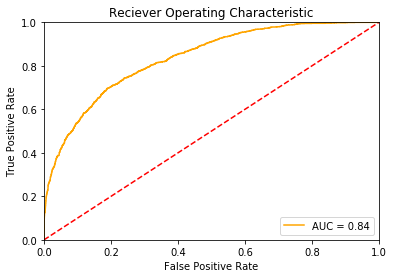

In [47]:
#Above- Confusion matrix, most positive cases correctly classified w/ 2987 vs 374, but negative cases score incorrectly w/ 924 correct vs 715 incorrect.
 # Overall accuracy of 0.78 is extremely misleading, & should be regarded w/ healthy skepticism. ?Negative cases poorly identified.?
 # Out of 5000 cases, 3361 positive & 1639 negative, indicating class imbalance
 # Negative cases not classified as well as positive ones, shown by precision, recall, & F1.


#Below- Compute & examine the ROC curve & AUC from metrics package w/in scikit-learn

def plot_auc(labels, probs):
    # Compute false positive rate, true positive rate & threshold along with the AUC 
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:, 1])
    auc = sklm.auc(fpr, tpr)
    
    plt.title('Reciever Operating Characteristic') #plot result
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)

C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 Confusion Matrix 
                 Score Positive     Score Negative 
Actual Positive      3361                  0
Actual Negative      1639                  0

Accuracy   0.67

            Positive     Negative
Num Case      3361          1639
Precision     0.67          0.00
Recall        1.00          0.00
F1            0.80          0.80


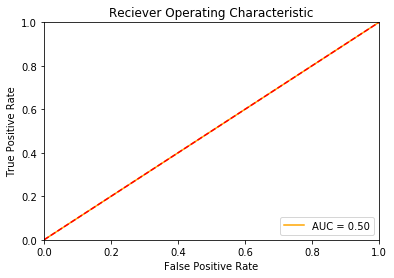

In [48]:
#Above- ROC curve is orange, above the red dotted line w/ AUC= 0.84.

#Below- To compare, the naive 'classifier', which is a hard coded algorithm, sets all cases to positive.

probs_positive = np.concatenate((np.ones((probabilities.shape[0], 1)),
                                np.zeros((probabilities.shape[0], 1))),
                               axis = 1)
scores_positive = score_model(probs_positive, 0.5)
print_metrics(y_test, scores_positive)
plot_auc(y_test, probs_positive)

In [49]:
#Above- Accuracy= 0.67, indicating class imbalance. ROC curve is directly on diagonal w/ AUC= 0.5.
 # The logistic regression classifier is better than this.
    
#Below- The class imbalance in label has biased the training of the model. The accuracy b/w logistic & naive 'classifier' are somewhat different.

# Try to weigh results towards correctly classifying non bike buyers/customers at expense of bike buyers/customers.
 # Use LogisiticRegression function w/ argument of class_weight as 0.45 & 0.55.

logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55})
logistic_mod.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [50]:
# Compute & examine class probabilities for each case

probabilities = logistic_mod.predict_proba(x_test)
print(probabilities[:15, :])

[[0.67165541 0.32834459]
 [0.48743705 0.51256295]
 [0.46761797 0.53238203]
 [0.62957595 0.37042405]
 [0.89450731 0.10549269]
 [0.96339208 0.03660792]
 [0.91184969 0.08815031]
 [0.89076362 0.10923638]
 [0.92452004 0.07547996]
 [0.77287811 0.22712189]
 [0.98739652 0.01260348]
 [0.27419451 0.72580549]
 [0.69616177 0.30383823]
 [0.6426589  0.3573411 ]
 [0.79504167 0.20495833]]


                 Confusion Matrix 
                 Score Positive     Score Negative 
Actual Positive      2896                465
Actual Negative       638               1001

Accuracy   0.78

            Positive     Negative
Num Case      3361          1639
Precision     0.82          0.68
Recall        0.86          0.61
F1            0.84          0.84


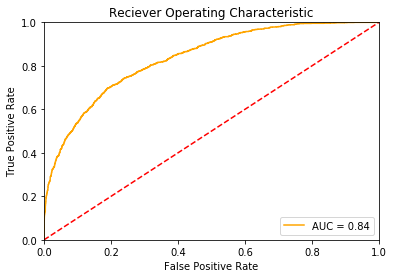

In [51]:
#Above- probabilities don't look much different from unweighted model

#Below- Compute & examine the scores & metrics to compare weighted vs. unweighted.

scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)
plot_auc(y_test, probabilities)

In [52]:
#Above- Accuracy stayed same at 0.78. Recall is slightly better for negative cases.
 # Weighting has helped a little bit. ROC curve & AUC essentially unchanged.
    
# Another way to improve the model is to adjust the scoring threshold.
 # Use for loop to evaluate scoring for model at different threshold values.
    
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For Threshold = ' + str(threshold))
    print_metrics(labels, scores)
    
thresholds = [0.45, 0.40, 0.35, 0.30, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For Threshold = 0.45
                 Confusion Matrix 
                 Score Positive     Score Negative 
Actual Positive      2802                559
Actual Negative       563               1076

Accuracy   0.78

            Positive     Negative
Num Case      3361          1639
Precision     0.83          0.66
Recall        0.83          0.66
F1            0.83          0.83

For Threshold = 0.4
                 Confusion Matrix 
                 Score Positive     Score Negative 
Actual Positive      2653                708
Actual Negative       470               1169

Accuracy   0.76

            Positive     Negative
Num Case      3361          1639
Precision     0.85          0.62
Recall        0.79          0.71
F1            0.82          0.82

For Threshold = 0.35
                 Confusion Matrix 
                 Score Positive     Score Negative 
Actual Positive      2467                894
Actual Negative       395               1244

Accuracy   0.74

            Positi

In [53]:
#Above- As threshold is decreased, # of correctly classified negative cases (non bike buyers/customers) increases @ expense of correctly classifying positive cases (bike buyers/customers).
 # Note accuracy decreases, still no very useful metric. Also note, # of FN (misclassified good credit customers) is ~4* that of FP (misclassified bad credit customers).?


#Below-  Cross Validation & Nested Cross Validation 
  # Perform simple cross validation

Labels = labels.reshape(labels.shape[0],)
scoring = ['precision_macro', 'recall_macro', 'roc_auc']  #create list of computed metrics for each fold
logistic_mod = linear_model.LogisticRegression(C = 1.0, class_weight = {0:0.45, 1:0.55})   # define object for logistic reg model
scores = ms.cross_validate(logistic_mod, Features, labels, scoring=scoring,
                        cv=10, return_train_score=False)  #cross_validate used from scikit-learn model_selection package

In [54]:
#Examine metrics, mean, & std dev for each fold in cv
 # also shows 'macro' precision & recall which are average over positive & negative cases
    
def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall       AUC')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_roc_auc'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_roc_auc'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_roc_auc'])))

print_cv(scores)   

         Precision     Recall       AUC
Fold  1    0.641        0.614      0.711
Fold  2    0.730        0.702      0.810
Fold  3    0.707        0.666      0.783
Fold  4    0.739        0.715      0.815
Fold  5    0.641        0.624      0.711
Fold  6    0.728        0.692      0.802
Fold  7    0.620        0.593      0.697
Fold  8    0.682        0.648      0.735
Fold  9    0.641        0.623      0.720
Fold 10    0.665        0.628      0.725
----------------------------------------
Mean       0.680        0.651      0.751
Std        0.042        0.039      0.044


In [55]:
#Above- Variability in each fold. Std dev is order of magnitude away from mean. No one fold is representative of performance metrics.
 # When compared to baseline model, recall and AUC are lower, but precision is higher. Also, metrics for baseline are w/in 1 std dev of average metrics from cv.
    
##Below- Perform optimization of hyperparameters w/ nested cross validation
 # This may or may not improve model selection.
    
 # Define randomly sampled folds for inner & outer loops   

nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)  #define fold selection using KFolds function from scikit-learn model_selection package
nr.seed(321)                                      # shuffle= true specifies that random shuffle is performed before folds are created
outside = ms.KFold(n_splits=10, shuffle = True)   # by creating these independent fold objects, there is no need to actually create nested loops for this process

In [56]:

nr.seed(3456)
# Define dictionary for grid search & model object to search on
param_grid = {"C": [0.1, 1, 10, 100, 1000]}  #List of 5 values to try & 10 fold validation being used (trained & evaluated 50 times)
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 0:0.55})  # Define logistic regression model object

# Perform grid search over the parameters using GridSearch function from scikit-learn model_selection package 
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside,    # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)

# Confusingly, scikit-learn LogisticRegression function uses regularization parameter C, which is inverse of usual l2 regularization parameter lambda.
 # thus the smaller parameter the stronger the regualrization

In [57]:
# Fit cross validated grid search over data using fit method

clf.fit(Features, Labels)
keys = list(clf.cv_results_.keys())  #AUC for each hyperparameter & fold is displayed in array
for key in keys[6:16]:
    print(clf.cv_results_[key])

clf.best_estimator_.C   # print best parameter value

[0.68917924 0.68917924 0.68917924 0.68917924 0.68917924]
[0.71763718 0.71763718 0.71763718 0.71763718 0.71763718]
[0.78677532 0.78683804 0.78684312 0.78684482 0.78684482]
[0.70095357 0.70095357 0.70095357 0.70095357 0.70095357]
[0.70971931 0.7097095  0.70971113 0.70971113 0.70971113]
[0.79947748 0.79954    0.79954845 0.79954845 0.79954845]
[0.76823749 0.76825747 0.76825914 0.76825914 0.76825914]
[0.79377466 0.79384187 0.79384691 0.79384523 0.79384523]
[0.7832024  0.78324421 0.78325425 0.78325592 0.78325592]
[0.76161371 0.76163029 0.76163029 0.76163195 0.76163195]


100

Performance metrics by parameter
Parameter   Mean performance   STD performance
    0.10        0.75106            0.04006
    1.00        0.75108            0.04009
   10.00        0.75109            0.04009
  100.00        0.75109            0.04009
 1000.00        0.75109            0.04009


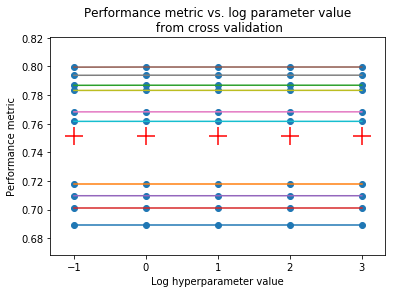

In [58]:
#Above- 10 folds by 5 hyperparameter values w/ optimal hyperparameter value- 100

#Below- Compute & examine mean & std dev of AUC for each hyperparameter value. Then plot AUC values for each fold vs hyperparemeter values
 # Mean AUC for each parameter are red + in plot

def plot_cv(clf, params_grid, param = 'C'):
    params = [x for x in params_grid[param]]
  
    keys = list(clf.cv_results_.keys())              
    grid = np.array([clf.cv_results_[key] for key in keys[6:16]])
    means = np.mean(grid, axis = 0)
    stds = np.std(grid, axis = 0)
    print('Performance metrics by parameter')
    print('Parameter   Mean performance   STD performance')
    for x,y,z in zip(params, means, stds):
        print('%8.2f        %6.5f            %6.5f' % (x,y,z))
    
    params = [math.log10(x) for x in params]
    
    plt.scatter(params * grid.shape[0], grid.flatten())
    p = plt.scatter(params, means, color = 'red', marker = '+', s = 300)
    plt.plot(params, np.transpose(grid))
    plt.title('Performance metric vs. log parameter value\n from cross validation')
    plt.xlabel('Log hyperparameter value')
    plt.ylabel('Performance metric')
    
plot_cv(clf, param_grid)    

In [59]:
#Above- Mean AUC for each hyperparameter w/in 1 std dev of each other (nearly identical), indicating model permformance not sentistive to choice of hyperparameter.
 # Variation in AUC from metric to metric, regardless of hyperparmeter, due to random sampling of data.
    
#Below- Complete outer loop of nested cv to evaluate performance of 'best' model selected by inner loop using cross_val_scores 
 # function from model_selection package
    
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, Features, Labels, cv = outside) # Use outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.751
SDT of the metric       = 0.030
Outcomes by cv fold
Fold  1    0.718
Fold  2    0.702
Fold  3    0.774
Fold  4    0.770
Fold  5    0.774
Fold  6    0.763
Fold  7    0.699
Fold  8    0.774
Fold  9    0.764
Fold 10    0.772


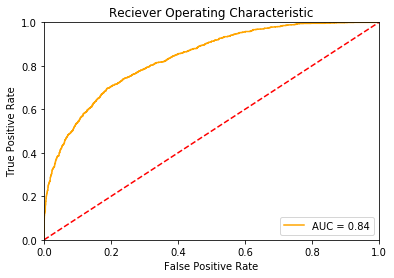

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [78]:
#Above- Mean AUC is same as estimated for inner loop & lower than baseline model.
 # All of these values are within 1 std dev of each other & thus these differences cannot be considered significant.
    
#Below- Build & test model using optimal hyperparameters

logistic_mod = linear_model.LogisticRegression(C = 100, class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(x_train, y_train)
probabilities = logistic_mod.predict_proba(x_test)
plot_auc(y_test, probabilities)
print(sklm.confusion_matrix(y_test, probabilities))
print_metrics(y_test, probabilities, 0.3)  


In [67]:
print(((y_test != 0.) & (y_test != 1.)).any())

## Try printing confusion matrix

False


In [83]:
## Feature Selection
 # Remove low variance features using VarianceThreshold function from scikit-learn feature_selection package
          # Identifies features w/ less than some threshold of unique values, for probability p= 0.8 is used, or 80%.
    # Apply threshold to variance of each feature & remove features w/ variance below that threshold using fit_transform method.
    # Results displayed as True or False logical for inclusion of each feature using get_support_ attribute
    
print(Features.shape)

sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))  # Define variance threhold
Features_reduced = sel.fit_transform(Features)         # Fit threshold to feature array

print(sel.get_support())  # Print support & shape for transformed features
print(Features_reduced.shape)


(16404, 33)
[False False False  True  True  True False False  True False  True  True
  True  True  True  True  True False False  True False False False False
 False  True False False False False False  True  True]
(16404, 15)


In [84]:
#Above-  Usuable features reduced from 33 to 15 where 18 low variance features were removed.

#Below- Check to see if high variance features are important or not using cv.
 # Features are recursively removed while cv finds changes to model performance to determine if feature should be deleted.
    

Labels2 = labels.reshape(labels.shape[0],)   # Reshape the Label array

nr.seed(988)
feature_folds = ms.KFold(n_splits=10, shuffle = True)  # Set folds for nested cross validation

logistic_mod2 = linear_model.LogisticRegression(C = 100, class_weight = {0:0.45, 1:0.55})   # Define model

nr.seed(6677)
selector = fs.RFECV(estimator = logistic_mod, cv = feature_folds, scoring = 'roc_auc')  # Perform feature selection by CV w/ high variance features only
selector = selector.fit(Features_reduced, Labels)
selector.support_ 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

In [85]:
#Above - 1 feature is eliminated

selector.ranking_  #see relative ranking of features

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [86]:
#Above- Features selected are '1', and features removed are '2'

#Below- Apply the selector to the feature array using transorm method

Features_reduced = selector.transform(Features_reduced)
Features_reduced.shape

(16404, 14)

Text(0.5,0,'Number of features')

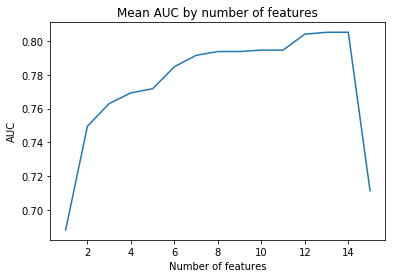

In [87]:
#Above- Features now reduced to 14 from 15 high variance features.

#Below- Plot the AUC (the metric) vs # of features

plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.title('Mean AUC by number of features')
plt.ylabel('AUC')
plt.xlabel('Number of features')

In [88]:
#Above- Change in AUC is not that great across range of features but drops at ~14 features selected.

#Below- Use nested cv to optimize model hyperperameter & test model performance w/ features currently selected

nr.seed(123)
inside2 = ms.KFold(n_splits=10, shuffle = True)  #Make inner loop
nr.seed(321)
outside2 = ms.KFold(n_splits=10, shuffle = True)  # Make outer loop

In [89]:
#Perform grid search for optimal model hyperparamter using AUC as metric

nr.seed(3456)
param_grid = {"C": [0.1, 1, 10, 100, 1000]}  # Define dictionary for grid search & model object to search on
logistic_mod2 = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55})  # Define logistic regression model

clf = ms.GridSearchCV(estimator = logistic_mod2, param_grid = param_grid,  # Perform grid search over parameters
                      cv = inside2,                                        # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)

clf.fit(Features_reduced, Labels2)   # Fit cross validated grid search over data 
clf.best_estimator_.C  # Print best parameter value


1

Performance Metrics by Parameter
Parameter   Mean Performance   STD Performance
    0.10        0.80553            0.01140
    1.00        0.80570            0.01137
   10.00        0.80565            0.01144
  100.00        0.80563            0.01144
 1000.00        0.80563            0.01144


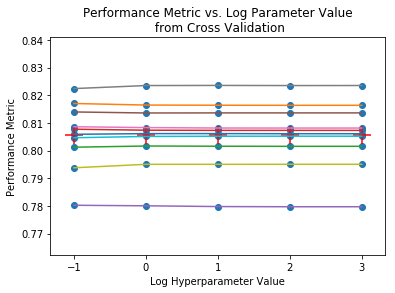

In [90]:
#Above- The optimal value of the hyperparameter is 1 which is larger than same model w/ all of the features/
  # Recall, parameter is inverse of regularization strength. So smaller the parameter means the model w/ fewer features requires less regularization.
    # larger parameter means the model with more features requires more regularization
    
#Below- Examine results of inner loop of cross validation

def plot_cv(clf, params_grid, param = 'C'):
    params = [x for x in params_grid[param]]
  
    keys = list(clf.cv_results_.keys())              
    grid = np.array([clf.cv_results_[key] for key in keys[6:16]])
    means = np.mean(grid, axis = 0)
    stds = np.std(grid, axis = 0)
    print('Performance Metrics by Parameter')
    print('Parameter   Mean Performance   STD Performance')
    for x,y,z in zip(params, means, stds):
        print('%8.2f        %6.5f            %6.5f' % (x,y,z))
    
    params = [math.log10(x) for x in params]
    
    plt.scatter(params * grid.shape[0], grid.flatten())
    p = plt.scatter(params, means, color = 'red', marker = '+', s = 300)
    plt.plot(params, np.transpose(grid))
    plt.title('Performance Metric vs. Log Parameter Value\n from Cross Validation')
    plt.xlabel('Log Hyperparameter Value')
    plt.ylabel('Performance Metric')
    
plot_cv(clf, param_grid)    

In [91]:
#Above- Parameter of 1 has highest AUC= 0.80570. AUC's are w/in 1 std dev of each other, indicating no hyperparmeter value 
 # is significantly better than the other values.
    
#Below- Perform outer loop of nested cv

nr.seed(498)
cv_estimate = ms.cross_val_score(clf, Features, Labels2, 
                                 cv = outside2) # Use the outside folds
print('Mean Performance Metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the Metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by CV Fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean Performance Metric = 0.734
SDT of the Metric       = 0.041
Outcomes by CV Fold
Fold  1    0.816
Fold  2    0.701
Fold  3    0.729
Fold  4    0.711
Fold  5    0.715
Fold  6    0.700
Fold  7    0.812
Fold  8    0.712
Fold  9    0.731
Fold 10    0.710


In [92]:
#Above- Performance metric of AUC= 0.734 is significantly different than for inner loop of cross validation.

#Below- Test model w/ 14 features selected & optimal hyperparameter of 1.0

nr.seed(1115)
indx = range(Features_reduced.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)  # Randomly sample cases to create independent training & test data
x_train = Features_reduced[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features_reduced[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

logistic_mod2 = linear_model.LogisticRegression(C = 1, class_weight = {0:0.45, 1:0.55})   # Define & fit logistic regression model
logistic_mod2.fit(x_train, y_train)

LogisticRegression(C=1, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [93]:
# Score model & examine resulting probabilities

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

probabilities = logistic_mod2.predict_proba(x_test)
print(probabilities[:15,:])
scores = score_model(probabilities, 0.3)

[[0.51892019 0.48107981]
 [0.47089331 0.52910669]
 [0.92174994 0.07825006]
 [0.94485629 0.05514371]
 [0.83093711 0.16906289]
 [0.9761029  0.0238971 ]
 [0.14538721 0.85461279]
 [0.54578981 0.45421019]
 [0.45801063 0.54198937]
 [0.50108248 0.49891752]
 [0.96389793 0.03610207]
 [0.85288493 0.14711507]
 [0.06355524 0.93644476]
 [0.55837231 0.44162769]
 [0.65402845 0.34597155]]


                 Confusion Matrix
                 Score Positive    Score Negative
Actual Positive      2033              1284
Actual Negative       326              1357

Accuracy        0.68
AUC             0.81
Macro Precision 0.69
Macro Recall    0.71
 
           Positive      Negative
Num Case     3317          1683
Precision    0.86          0.51
Recall       0.61          0.81
F1           0.72          0.63


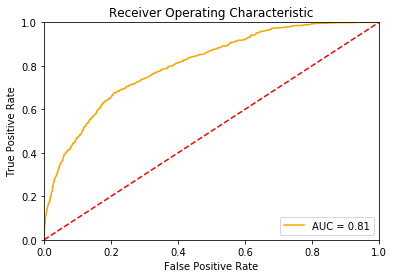

In [94]:
# Display performance metric for model

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion Matrix')
    print('                 Score Positive    Score Negative')
    print('Actual Positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual Negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro Precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro Recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num Case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

def plot_auc(labels, probs):
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])    # Compute FP rate, TP rate & threshold w/ AUC
    auc = sklm.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')         # Plot result
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    
        
print_metrics(y_test, probabilities, 0.3)    
plot_auc(y_test, probabilities)   

In [106]:
#Above- AUC= 0.81 is higher than achieved w/ cv, which indicates these results are overly optimistic & is common when a single slpit is used to eval model.


## Dimensionality Reduction for Classification

#Below- There are 1000 cases w/ 35 features & 1 label. Numeric features wer Zscore scaled so they are 0 centered (mean removed) & unit variance (divide by std dev).
   # Before peforming PCS, all features must be 0 mean & unit variance, otherwise results in biased computation of component & scales.
   # Compute principle components for training feature subset

pca_mod = skde.PCA()
pca_comps = pca_mod.fit(x_train)
pca_comps

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [107]:
# Examine variance for each component & sum of variance

print(pca_comps.explained_variance_ratio_)
print(np.sum(pca_comps.explained_variance_ratio_))

[2.13932704e-01 1.47559499e-01 7.59291366e-02 7.32198098e-02
 5.72837317e-02 5.45720987e-02 4.60003306e-02 3.98206450e-02
 3.75876991e-02 3.09711688e-02 3.05778425e-02 2.60748592e-02
 2.21819371e-02 2.10822219e-02 1.95294980e-02 1.76298683e-02
 1.55957654e-02 1.48226996e-02 1.21117102e-02 1.10334706e-02
 8.34345811e-03 6.51413591e-03 5.90638105e-03 5.24501098e-03
 3.61348908e-03 2.86082897e-03 5.71221795e-31 1.14126692e-31
 1.41097525e-32 9.54883382e-33 3.03188781e-33 2.25674735e-33
 1.07052033e-33]
1.0


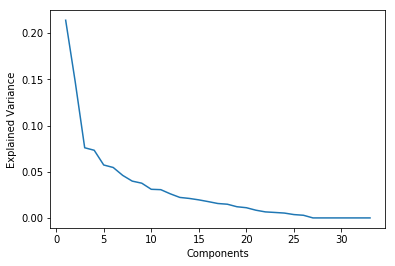

In [108]:
#Above- variance ratios are in decending order w/ sum= 1.0

#Below- Plot explained variance vs. component

def plot_explained(mod):
    comps = mod.explained_variance_ratio_
    x = range(len(comps))
    x = [y + 1 for y in x]          
    plt.plot(x,comps)
    plt.xlabel('Components')
    plt.ylabel('Explained Variance')

plot_explained(pca_comps)

In [109]:
#Above- The scree plot above shows rapid decrease in explained variance until ~5th component then slowly thereafter.
 #First few components explain large fraction of variance & therefore contain much of explanatory info in data.
  #The 'knee' or inflection point in scree curve is used to choose # of components selected, ~5.

#Below- Create/train & fit PCA model w/ reduced to 5 components, then transforms features using that model

pca_mod_5 = skde.PCA(n_components = 5)
pca_mod_5.fit(x_train)
Comps = pca_mod_5.transform(x_train)
Comps.shape

(11404, 5)

In [110]:
# Compute & evaluate logisitic regression model using features transformed by first 5 components.

log_mod_5 = linear_model.LogisticRegression(C = 10.0, class_weight = {0:0.45, 1:0.55})   # Define & fit the logistic regression model
log_mod_5.fit(Comps, y_train)
print(log_mod_5.intercept_)
print(log_mod_5.coef_)

[-0.70793938]
[[ 0.22389774 -0.95166926 -0.63229909  0.29284592 -1.01107191]]


                 Confusion Matrix
                 Score Positive    Score Negative
Actual Positive      1887              1474
Actual Negative       306              1333

Accuracy        0.64
AUC             0.78
Macro Precision 0.67
Macro Recall    0.69
 
           Positive      Negative
Num Case     3361          1639
Precision    0.86          0.47
Recall       0.56          0.81
F1           0.68          0.60


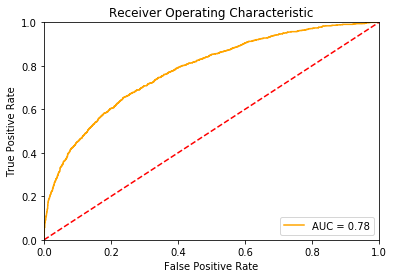

In [112]:
#Above- Intercept is shown w/ 5 regression coefficients

#Below- Transform & evaluate test model using same PCA transformation used for training data

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion Matrix')
    print('                 Score Positive    Score Negative')
    print('Actual Positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual Negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro Precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro Recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num Case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    

probabilities = log_mod_5.predict_proba(pca_mod_5.transform(x_test))
print_metrics(y_test, probabilities, 0.3)    
plot_auc(y_test, probabilities)     

In [113]:
# For comparision w/ 5 component above, compute & evaluate logisitic model w/ first 10 principle components.

pca_mod_10 = skde.PCA(n_components = 10)
pca_mod_10.fit(x_train)
Comps_10 = pca_mod_10.transform(x_train)
Comps_10.shape

(11404, 10)

In [114]:
# Define & fit logisitic regression model using 10 components of transformed features

log_mod_10 = linear_model.LogisticRegression(C = 10.0, class_weight = {0:0.45, 1:0.55})  # define & fit the linear regression model 
log_mod_10.fit(Comps_10, y_train)

LogisticRegression(C=10.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

                 Confusion Matrix
                 Score Positive    Score Negative
Actual Positive      2086              1275
Actual Negative       305              1334

Accuracy        0.68
AUC             0.81
Macro Precision 0.69
Macro Recall    0.72
 
           Positive      Negative
Num Case     3361          1639
Precision    0.87          0.51
Recall       0.62          0.81
F1           0.73          0.63


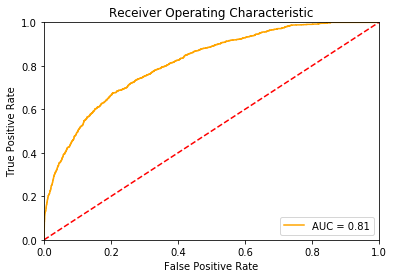

In [115]:
# Score & display performance metrics, ROC curve, & AUC.

probabilities = log_mod_10.predict_proba(pca_mod_10.transform(x_test))
print_metrics(y_test, probabilities, 0.3)  
plot_auc(y_test, probabilities)     

In [116]:
#Above- All metrics have improved using 10 components instead of 5. But is it really significant?

#Below- Perform cross validation (cv) on result. At risk of small bias, fitting of PCA model (normally done) has been omitted.

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall       AUC')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_roc_auc'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_roc_auc'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_roc_auc'])))
  
Labels = Labels.reshape(Labels.shape[0],)
scoring = ['precision_macro', 'recall_macro', 'roc_auc']

In [117]:
# PCA model scores for 5 components

pca_mod = skde.PCA(n_components = 5)
pca_mod.fit(Features)
Comps = pca_mod.transform(Features)

scores = ms.cross_validate(log_mod_5, Comps, Labels, scoring=scoring,
                        cv=10, return_train_score=False)
print_cv(scores)  

         Precision     Recall       AUC
Fold  1    0.630        0.646      0.712
Fold  2    0.630        0.645      0.704
Fold  3    0.618        0.631      0.669
Fold  4    0.625        0.641      0.693
Fold  5    0.643        0.661      0.718
Fold  6    0.652        0.671      0.727
Fold  7    0.644        0.649      0.710
Fold  8    0.669        0.683      0.746
Fold  9    0.651        0.665      0.734
Fold 10    0.665        0.675      0.739
----------------------------------------
Mean       0.643        0.657      0.715
Std        0.016        0.016      0.022


In [118]:
# PCA model scores for 10 components

pca_mod = skde.PCA(n_components = 10)
pca_mod.fit(Features)
Comps = pca_mod.transform(Features)

scores = ms.cross_validate(log_mod_10, Comps, Labels, scoring=scoring,
                        cv=10, return_train_score=False)
print_cv(scores)  

         Precision     Recall       AUC
Fold  1    0.671        0.686      0.735
Fold  2    0.656        0.674      0.726
Fold  3    0.636        0.646      0.695
Fold  4    0.650        0.665      0.718
Fold  5    0.661        0.679      0.744
Fold  6    0.654        0.673      0.729
Fold  7    0.644        0.652      0.723
Fold  8    0.755        0.702      0.805
Fold  9    0.658        0.673      0.744
Fold 10    0.739        0.694      0.801
----------------------------------------
Mean       0.672        0.674      0.742
Std        0.039        0.016      0.033


In [136]:
#Above- The AUC & std dev for 5 components looks to be significantly different for the AUC & std dev of 10 components.
 # This differenece supports hypothesis that first 10 components all contain useful info.




In [ ]:
#Above- Performance metrics look good.Large majority of negative (bad credit) cases are identified at expense of significant fp.
  #Reported AUC is w/in a std dev of AUC obtained w/ cv, indicating model is generalizing well.




In [ ]:
#Above- Now 300 of each label case w/ 600 cases overall.

#Below- Perform model selection again w/ ncv
 #Compute inner loop to find optimal learning rate parameter
    
nr.seed(1234)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(3214)
outside = ms.KFold(n_splits=10, shuffle = True)

ab_clf = AdaBoostClassifier()    # Define AdaBoosted tree model
nr.seed(3456)

nr.seed(4455)
ab_clf = ms.GridSearchCV(estimator = ab_clf, param_grid = param_grid,    # Perform grid search over parameters
                      cv = inside,                     # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
ab_clf.fit(temp_Features, temp_Labels)
print(ab_clf.best_estimator_.learning_rate)

In [ ]:
#Above- Estimated optimal learning rate parameter is small (0.1) than before (1).

#Below- Perform outer cv of model

nr.seed(498)
cv_estimate = ms.cross_val_score(ab_clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean Performance Metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the Metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by CV Fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

In [ ]:
#Above- Average AUC is improved compared to imbalanced training cases. Differences are w/in 1 std dev. Still reasonable chance represent improvement.

#Below- Train & evaluate model w/ balanced cases & updated hyperparameter.
  # Create Bernoulli sampled test & training subsets
  # Define AdaBoosted model
  # Train AdaBoosted model
    

nr.seed(1115)
indx = range(Features.shape[0])   # Randomly sample cases to create independent training & test data
indx = ms.train_test_split(indx, test_size = 300)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

# Undersample majority case for training data
temp_Labels_1 = y_train[y_train == 1]      # Save these
temp_Features_1 = x_train[y_train == 1,:]      # Save these
temp_Labels_0 = y_train[y_train == 0]       # Undersample these
temp_Features_0 = x_train[y_train == 0,:]     # Undersample these

indx = nr.choice(temp_Features_0.shape[0], temp_Features_1.shape[0], replace=True)

x_train = np.concatenate((temp_Features_1, temp_Features_0[indx,:]), axis = 0)
y_train = np.concatenate((temp_Labels_1, temp_Labels_0[indx,]), axis = 0) 

print(np.bincount(y_train))
print(x_train.shape)
print(y_train.shape)

In [ ]:
# Define & fit the model
nr.seed(1115)
ab_mod = AdaBoostClassifier(learning_rate = ab_clf.best_estimator_.learning_rate) 
ab_mod.fit(x_train, y_train)

In [ ]:
# Score & evaluate the model

probabilities = ab_mod.predict_proba(x_test)
print_metrics(y_test, probabilities, 0.5)    

In [ ]:
#Above- Results are significantly better than previously obtained imbalanced training data in classifying negative cases.
  # AUC is more than 1 std dev away from ncv AUC.